In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


According to problem statement, a value of zero in the following columns indicates missing value:

Glucose
BloodPressure

SkinThickness

Insulin

BMI

We will replace zeros in these columns with null values.

In [3]:
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_null_as_zero] = df[cols_with_null_as_zero].replace(0, np.NaN)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Exploring these variables using histograms and treating the missing values accordingly:**

<AxesSubplot:>

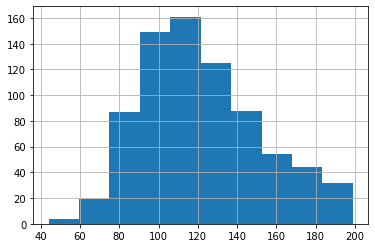

In [8]:
df['Glucose'].hist()

<AxesSubplot:>

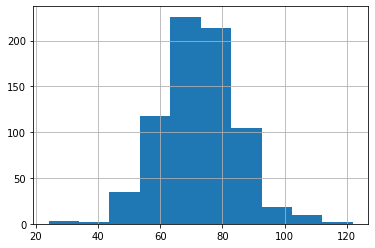

In [9]:
df['BloodPressure'].hist()

<AxesSubplot:>

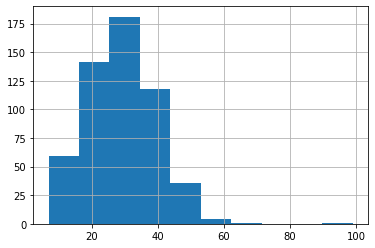

In [10]:
df['SkinThickness'].hist()

<AxesSubplot:>

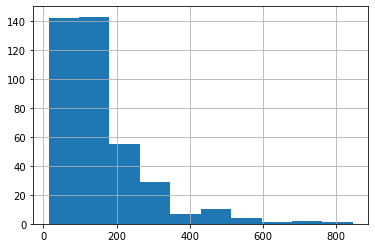

In [11]:
df['Insulin'].hist()

<AxesSubplot:>

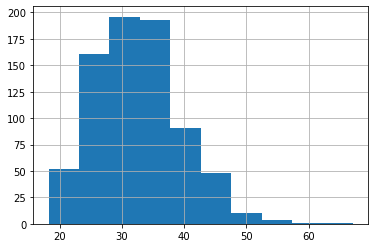

In [12]:
df['BMI'].hist()

From above histograms, it is clear that Insulin has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore we will treat missing values in these 5 variables as below:-

Glucose - replace missing values with mean of values.

BloodPressure - replace missing values with mean of values.

SkinThickness - replace missing values with mean of values.

Insulin - replace missing values with median of values.

BMI - replace missing values with mean of values.

In [13]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [14]:
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean_for_null] = df[cols_mean_for_null].fillna(df[cols_mean_for_null].mean())

**(3) Createing a count (frequency) plot describing the data types and the count of variables:**

<AxesSubplot:>

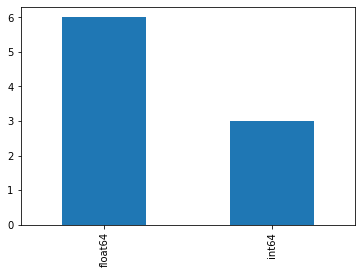

In [15]:
df.dtypes.value_counts().plot(kind='bar')

 **Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:**

0    500
1    268
Name: Outcome, dtype: int64

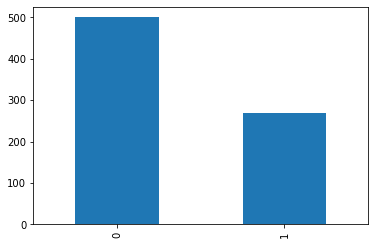

In [16]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

Since classes in Outcome is little skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since:

It generates new samples by interpolation.

It doesn't duplicate data.

In [17]:
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
df_X_resampled, df_y_resampled = SMOTE(random_state=100).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


1    500
0    500
Name: Outcome, dtype: int64

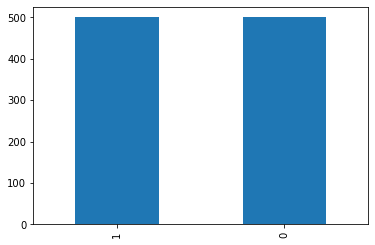

In [21]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

**Creating scatter charts between the pair of variables to understand the relationships:**

In [22]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,1,164.045192,54.128280,25.935860,621.406727,36.412099,0.282034,34,1
996,2,122.788919,70.728218,22.771383,125.000000,28.187203,0.232503,36,1
997,5,148.139351,84.512270,29.071365,125.534838,33.339351,0.620830,57,1
998,9,159.943751,95.858327,29.153420,125.000000,34.589789,0.197392,45,1


<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

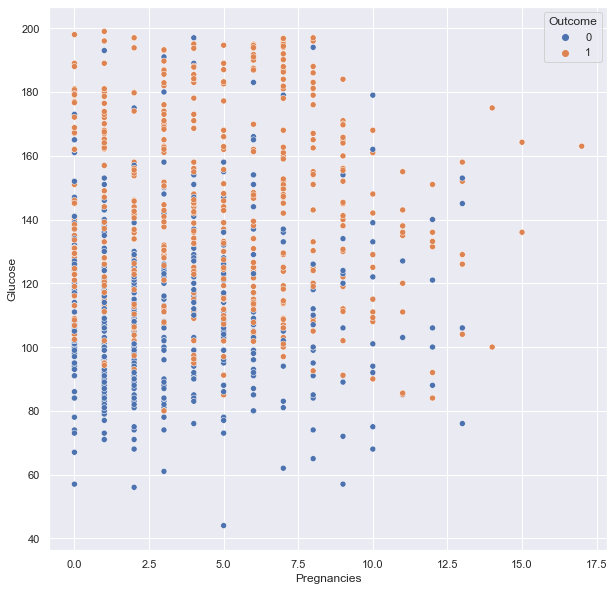

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=df_resampled, hue="Outcome")

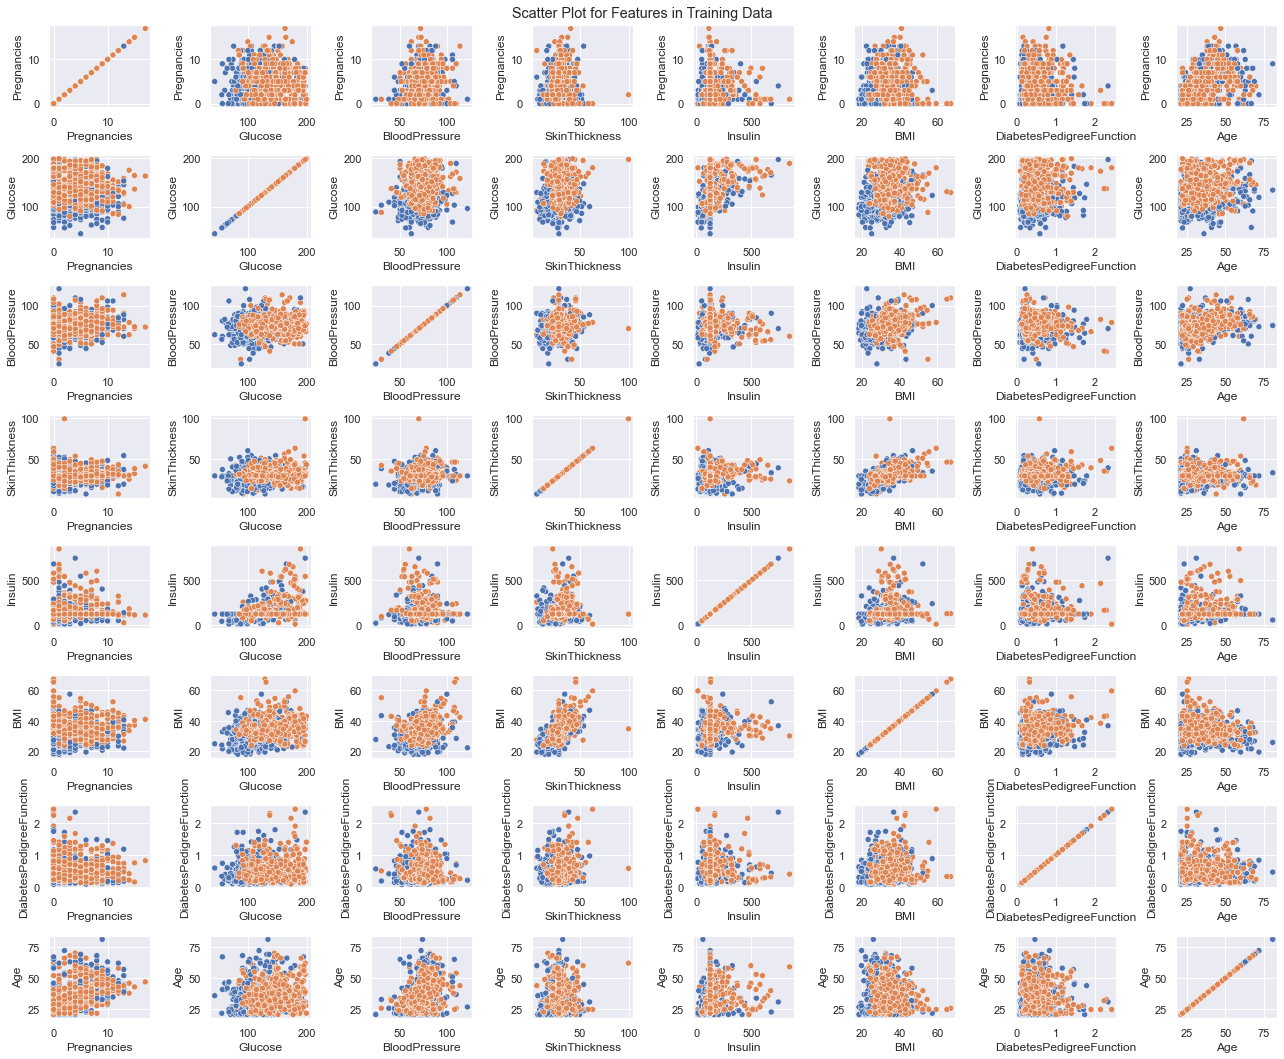

In [24]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(df_X_resampled.columns):
    for j, col_x in enumerate(df_X_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

We have some interesting observations from above scatter plot of pairs of features:

Glucose alone is impressively good to distinguish between the Outcome classes.

Age alone is also able to distinguish between classes to some extent.

It seems none of pairs in the dataset is able to clealry distinguish between the Outcome classes.

We need to use combination of features to build model for prediction of classes in Outcome.

 **Performing correlation analysis. Visually explore it using a heat map:**

In [25]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.111418,0.220954,0.066416,-0.031587,0.000818,-0.057957,0.545885
Glucose,0.111418,1.000000,0.204605,0.189634,0.407390,0.234148,0.135250,0.260517
BloodPressure,0.220954,0.204605,1.000000,0.172867,-0.015417,0.285529,-0.033525,0.339041
SkinThickness,0.066416,0.189634,0.172867,1.000000,0.176551,0.544061,0.128655,0.099714
Insulin,-0.031587,0.407390,-0.015417,0.176551,1.000000,0.181248,0.109770,0.066907
BMI,0.000818,0.234148,0.285529,0.544061,0.181248,1.000000,0.162648,0.007608
DiabetesPedigreeFunction,-0.057957,0.135250,-0.033525,0.128655,0.109770,0.162648,1.000000,0.003585
Age,0.545885,0.260517,0.339041,0.099714,0.066907,0.007608,0.003585,1.000000


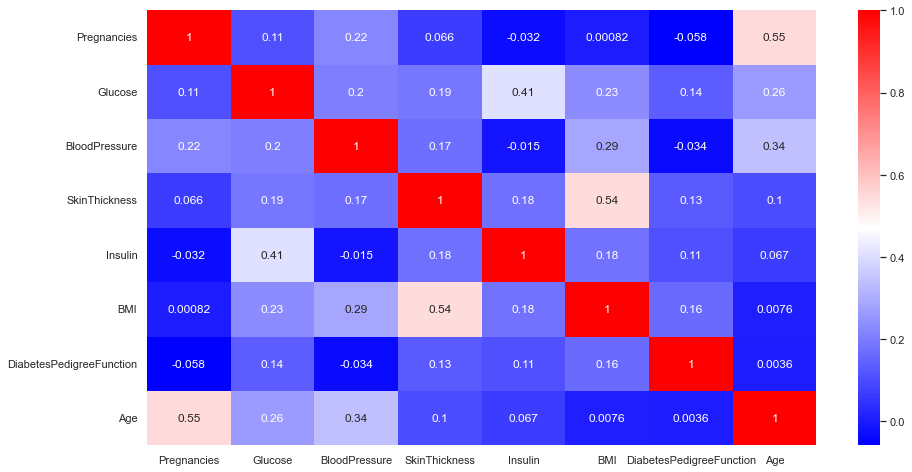

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df_X_resampled.corr(), cmap='bwr', annot=True);

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such as -

Age-Pregnancies

BMI-SkinThickness

 Devising strategies for model building. It is important to decide the right validation framework. 

Since this is a classification problem, we will be building all popular classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

1) Logistic Regression
2) Decision Tree
3) RandomForest Classifier
4) K-Nearest Neighbour (KNN) 
5) Support Vector Machine (SVM)
6) Naive Bayes
7) Ensemble Learning -> Boosting -> Adaptive Boosting
8) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)

We will use use GridSearchCV with Cross Validation (CV) = 5 for training and testing model which will give us insight about model performance on versatile data. It helps to loop through predefined hyperparameters and fit model on training set. GridSearchCV performs hyper parameter tuning which will give us optimal hyper parameters for each of the model. We will again train model with these optimized hyper parameters and then predict test data to get metrics for comparing all models.

Performing Train - Test split on input data (To train and test model without Cross Validation and Hyper Parameter Tuning):

In [27]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.15, random_state =100)

**Appling an appropriate classification algorithm to build a model. Comparing various models with the results from KNN algorithm.**

**1) Logistic Regression:`**

In [237]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [238]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)

In [239]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [240]:
lr.score(X_train,y_train)

0.76

In [241]:
lr.score(X_test, y_test)

0.76

**Performance evaluation and optimizing parameters using GridSearchCV:** Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C' with the help of GridSearchCV. So we have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.

In [242]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [243]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [244]:
gs_lr = GridSearchCV(lr, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [245]:
gs_lr.best_params_

{'C': 13.257113655901108}

In [246]:
gs_lr.best_score_

0.751

In [247]:
lr2 = LogisticRegression(C=13.257113655901108, max_iter=300)

In [248]:
lr2.fit(X_train,y_train)

LogisticRegression(C=13.257113655901108, max_iter=300)

In [249]:
lr2.score(X_train,y_train)

0.7611764705882353

In [250]:
lr2.score(X_test, y_test)

0.76

AUC: 0.839


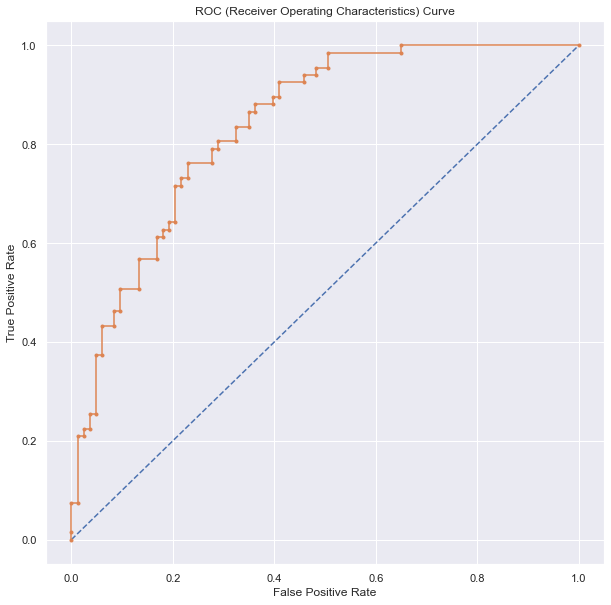

In [251]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.731 auc_pr=0.786 ap=0.788


Text(0.5, 1.0, 'Precision-Recall Curve')

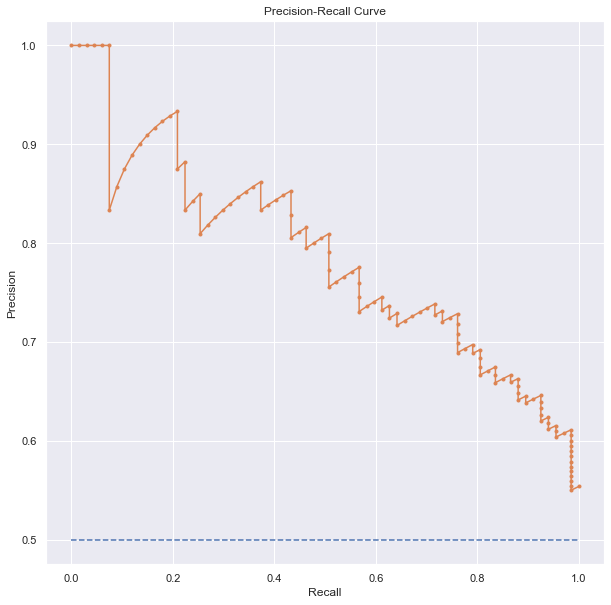

In [252]:

from sklearn.metrics import precision_recall_curve
pred_y_test = lr2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [253]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

**2) Decision Tree:**

In [254]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)     

In [255]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [256]:
dt1.score(X_train,y_train)           # Decision Tree always 100% accuracy over train data

1.0

In [257]:
dt1.score(X_test, y_test)

0.7266666666666667

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [258]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [259]:
gs_dt = GridSearchCV(dt1, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [260]:
gs_dt.best_params_

{'max_depth': 5}

In [261]:
gs_dt.best_score_

0.762

In [262]:
dt1.feature_importances_

array([0.04671456, 0.31456843, 0.06275534, 0.06904818, 0.0913995 ,
       0.19291867, 0.10348904, 0.11910628])

In [263]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

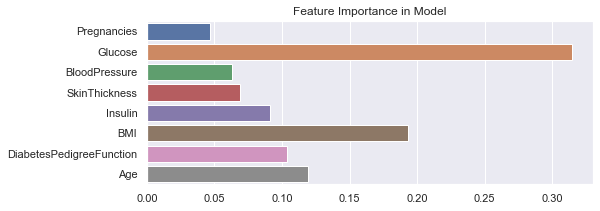

In [264]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=dt1.feature_importances_)
plt.title("Feature Importance in Model");

In [265]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [266]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [267]:
dt2.score(X_train,y_train)

0.8164705882352942

In [268]:
dt2.score(X_test,y_test)

0.7266666666666667

AUC: 0.835


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

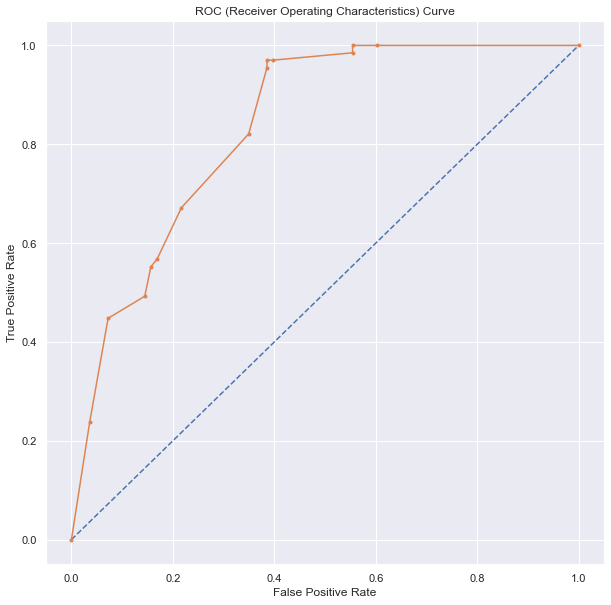

In [269]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.728 auc_pr=0.780 ap=0.753


Text(0.5, 1.0, 'Precision-Recall Curve')

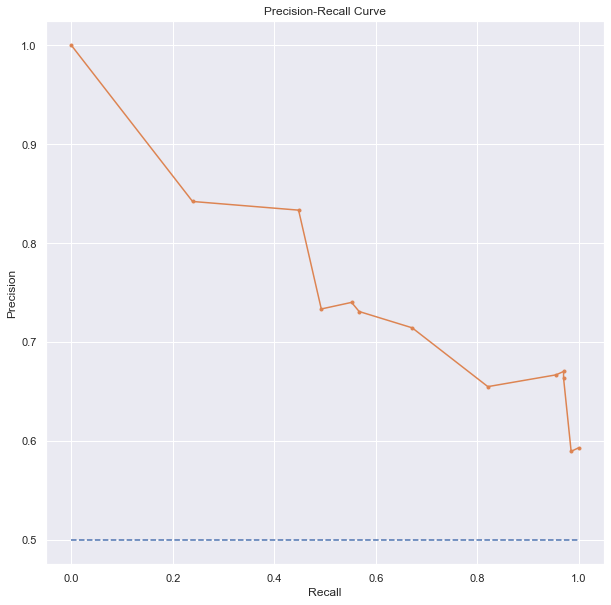

In [270]:
# Precision Recall Curve 

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [271]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

**3)RandomForest Classifier**

In [272]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [273]:
rf1 = RandomForestClassifier(random_state=0)

In [274]:
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [275]:
rf1.score(X_train, y_train)            # Random Forest also 100% accuracy over train data always

1.0

In [276]:
rf1.score(X_test, y_test)

0.8466666666666667

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [277]:
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [278]:
gs_rf = GridSearchCV(estimator=rf1, param_grid=parameters, cv=5, verbose=0)
gs_rf.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [279]:
gs_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150}

In [280]:
gs_rf.best_score_

0.825

In [281]:
rf1.feature_importances_

array([0.06903437, 0.26001362, 0.08444339, 0.08625883, 0.09126198,
       0.1604058 , 0.11654588, 0.13203613])

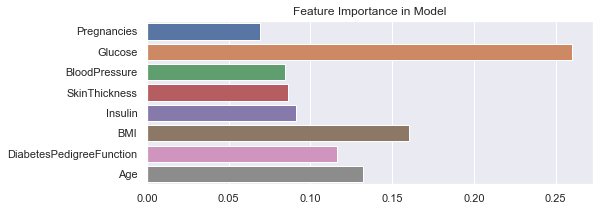

In [282]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf1.feature_importances_);
plt.title("Feature Importance in Model");

In [283]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=150)

In [284]:
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [285]:
rf2.score(X_train,y_train)

1.0

In [286]:
rf2.score(X_test, y_test)

0.8466666666666667

AUC: 0.936


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

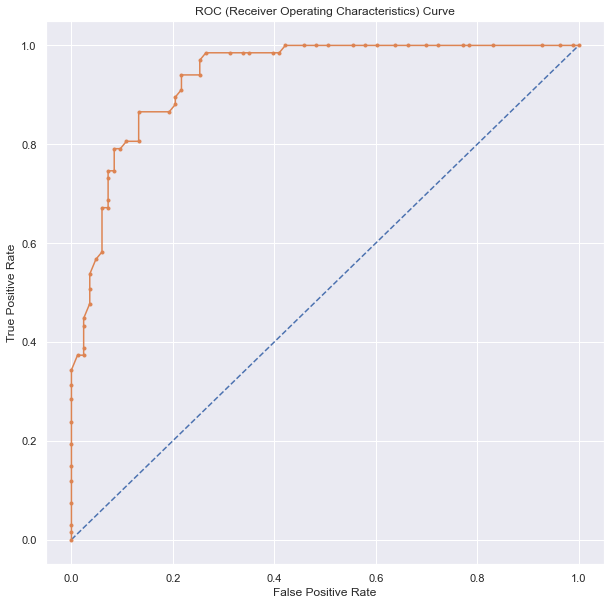

In [287]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.835 auc_pr=0.915 ap=0.915


Text(0.5, 1.0, 'Precision-Recall Curve')

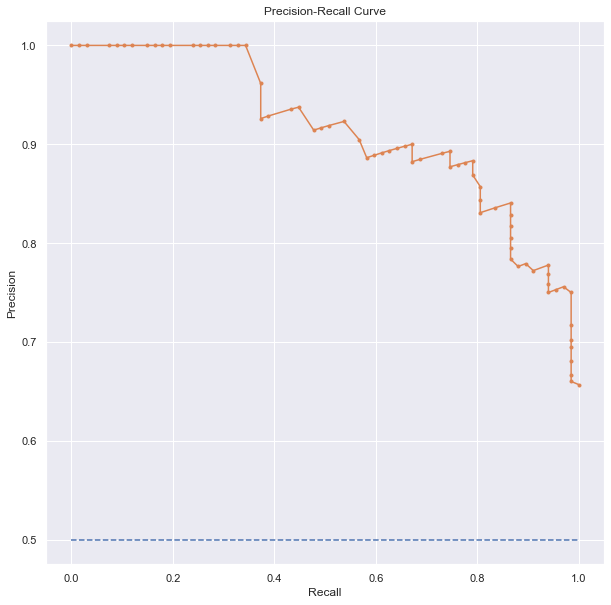

In [288]:
# Precision Recall Curve 

pred_y_test = rf2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [289]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

**4) K-Nearest Neighbour (KNN) Classification:**

In [290]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

In [291]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [292]:
knn1.score(X_train,y_train)

0.8682352941176471

In [293]:
knn1.score(X_test,y_test)

0.78

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [294]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [295]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [296]:
gs_knn.best_params_

{'n_neighbors': 3}

In [297]:
gs_knn.best_score_

0.7779999999999999

In [298]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.764, 0.778, 0.751, 0.752, 0.742, 0.74 , 0.749, 0.753, 0.757,
       0.758, 0.763, 0.753, 0.762, 0.747])

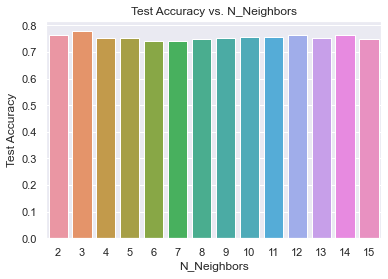

In [299]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

In [300]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [301]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [302]:
knn2.score(X_train,y_train)

0.8682352941176471

In [303]:
knn2.score(X_test,y_test)

0.78

AUC: 0.844


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

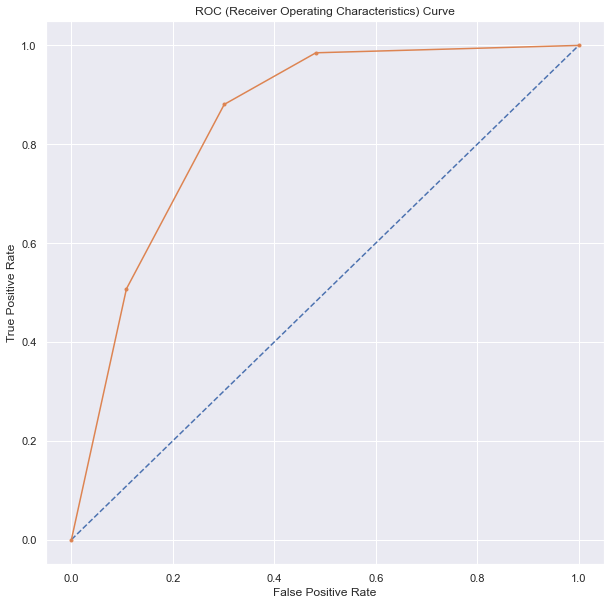

In [304]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.781 auc_pr=0.810 ap=0.735


Text(0.5, 1.0, 'Precision-Recall Curve')

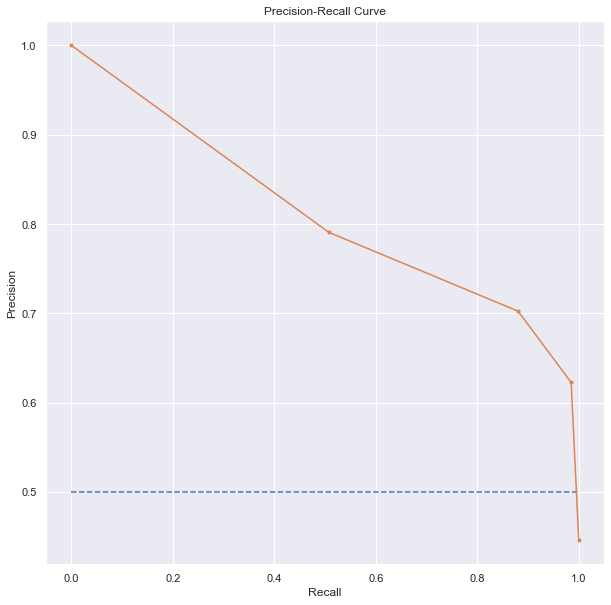

In [305]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [306]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

**5) Support Vector Machine (SVM) Algorithm:**

In [307]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')

In [308]:
svm1.fit(X_train, y_train)

SVC()

In [309]:
svm1.score(X_train, y_train)

0.74

In [310]:
svm1.score(X_test, y_test)

0.74

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [311]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [312]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [313]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [314]:
gs_svm.best_score_

0.7929999999999999

In [315]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)

In [316]:
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [317]:
svm2.score(X_train, y_train)

0.9976470588235294

In [318]:
svm2.score(X_test, y_test)

0.8266666666666667

AUC: 0.888


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

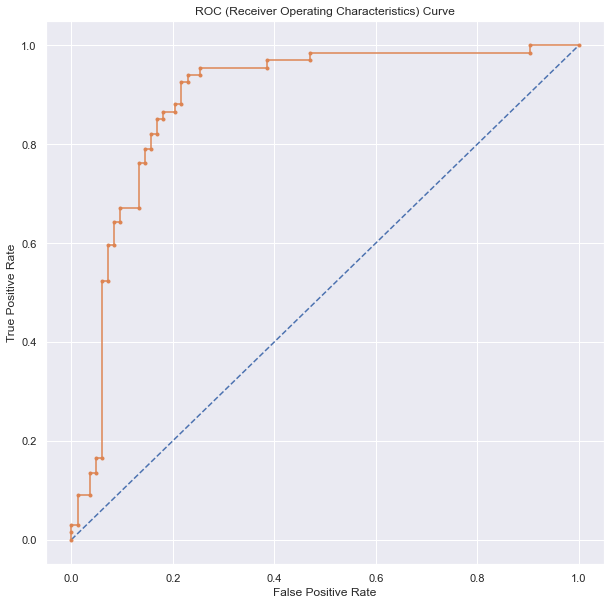

In [319]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.817 auc_pr=0.800 ap=0.804


Text(0.5, 1.0, 'Precision-Recall Curve')

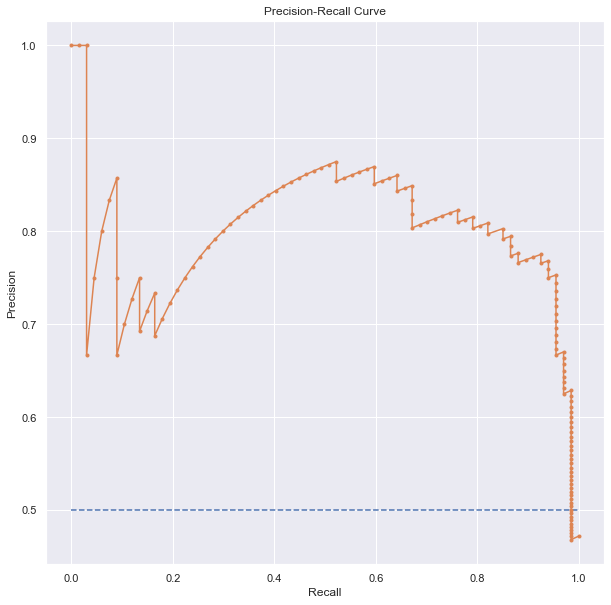

In [320]:
# Precision Recall Curve 

pred_y_test = svm2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [321]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

**6) Naive Bayes Algorithm:**

In [322]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [323]:
gnb.fit(X_train, y_train)

GaussianNB()

In [324]:
gnb.score(X_train, y_train)

0.7223529411764706

In [325]:
gnb.score(X_test, y_test)

0.72

**Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.**

AUC: 0.823


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

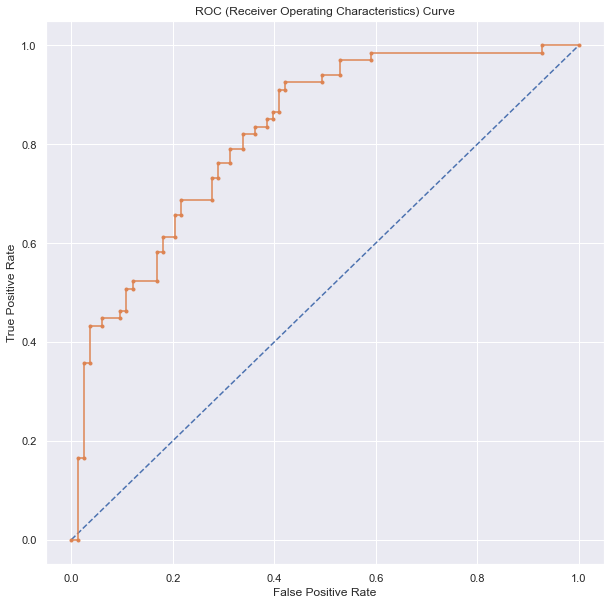

In [326]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = gnb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_gnb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.656 auc_pr=0.755 ap=0.763


Text(0.5, 1.0, 'Precision-Recall Curve')

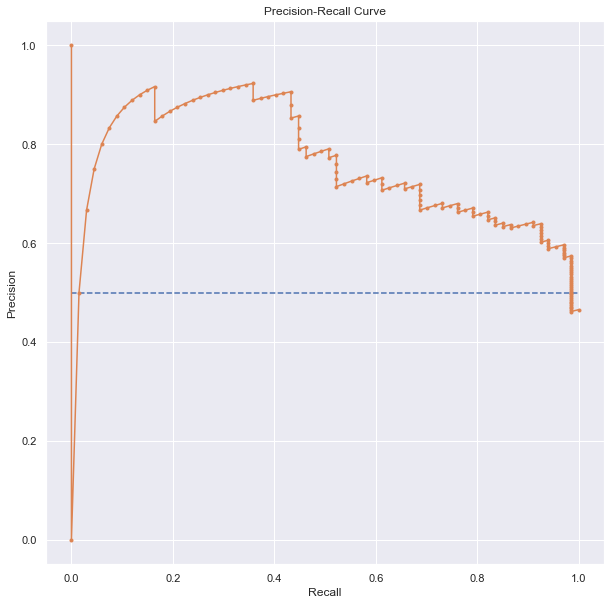

In [327]:
# Precision Recall Curve 

pred_y_test = gnb.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_gnb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [328]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_gnb)

**7) Ensemble Learning --> Boosting --> Adaptive Boosting:**

In [329]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=100)

In [330]:
ada1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [331]:
ada1.score(X_train,y_train)

0.8341176470588235

In [332]:
ada1.score(X_test, y_test)

0.7533333333333333

**Performance evaluation and optimizing parameters using cross_val_score:**

In [333]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [334]:
gs_ada = GridSearchCV(ada1, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [335]:
gs_ada.best_params_

{'n_estimators': 200}

In [336]:
gs_ada.best_score_

0.773

In [337]:
ada1.feature_importances_

array([0.07, 0.18, 0.05, 0.14, 0.09, 0.24, 0.15, 0.08])

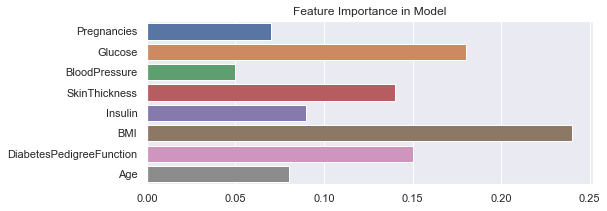

In [338]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=ada1.feature_importances_)
plt.title("Feature Importance in Model");

In [339]:
ada2 = AdaBoostClassifier(n_estimators=200)

In [340]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [341]:
ada2.score(X_train,y_train)

0.8588235294117647

In [342]:
ada2.score(X_test, y_test)

0.78

AUC: 0.845


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

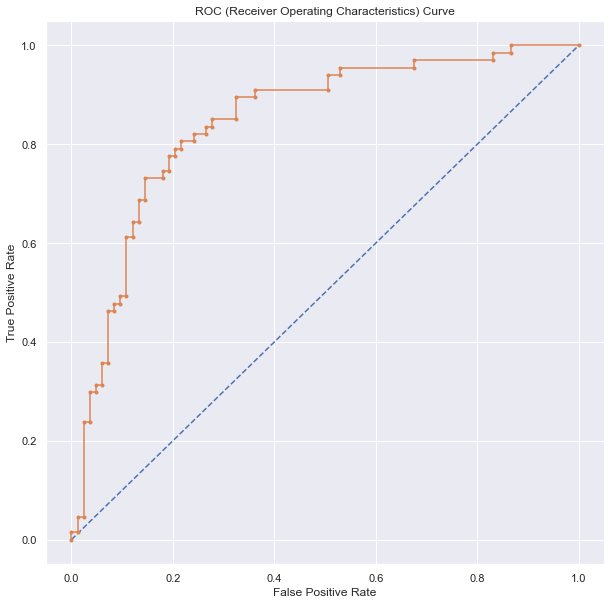

In [343]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = ada2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_ada = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.769 auc_pr=0.770 ap=0.776


Text(0.5, 1.0, 'Precision-Recall Curve')

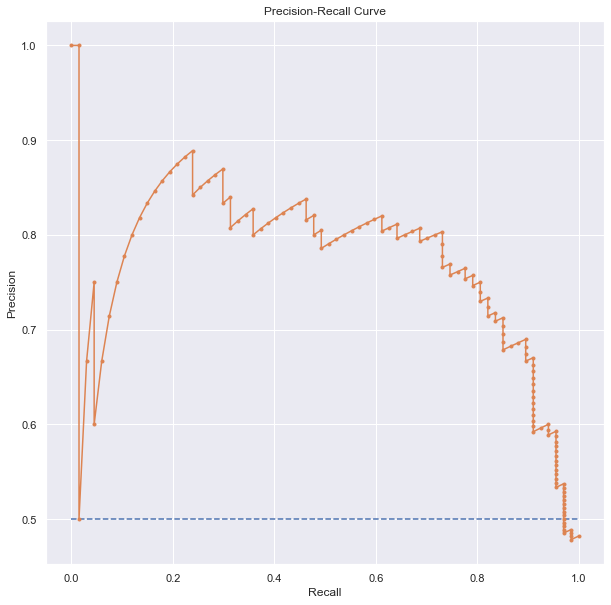

In [344]:
# Precision Recall Curve 

pred_y_test = ada2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_ada_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_ada_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [345]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_ada)

**8) Ensemble Learning --> Boosting --> Gradient Boosting (XGBClassifier):**

In [346]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)

C:\Users\91940\anaconda\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [347]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto', ...)

In [348]:
xgb1.score(X_train, y_train) 

1.0

In [349]:
xgb1.score(X_test, y_test)

0.82

In [350]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [351]:

gs_xgb = GridSearchCV(xgb1, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(df_X_resampled, df_y_resampled)

C:\Users\91940\anaconda\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91940\anaconda\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...56,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_con

In [352]:
gs_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140}

In [353]:
gs_xgb.best_score_

0.8833400000000001

In [354]:
xgb1.feature_importances_

array([0.08192869, 0.24167173, 0.08726668, 0.08915504, 0.12994848,
       0.1436588 , 0.08942464, 0.13694592], dtype=float32)

Text(0.5, 1.0, 'Feature Importance in Model')

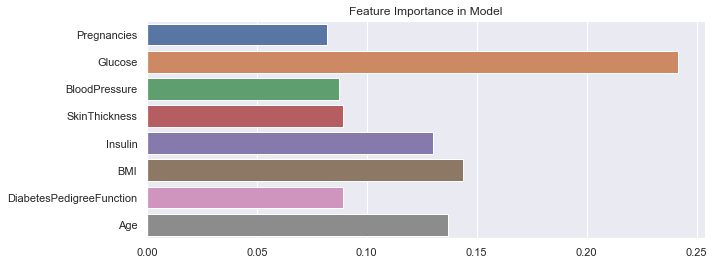

In [355]:
plt.figure(figsize=(10,4))
sns.barplot(y=X_train.columns, x=xgb1.feature_importances_)
plt.title("Feature Importance in Model")

In [356]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.1, max_depth= 7, n_estimators= 140)

C:\Users\91940\anaconda\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [357]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [358]:
xgb2.score(X_train,y_train)

1.0

In [359]:
xgb2.score(X_test, y_test)

0.8066666666666666

AUC: 0.898


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

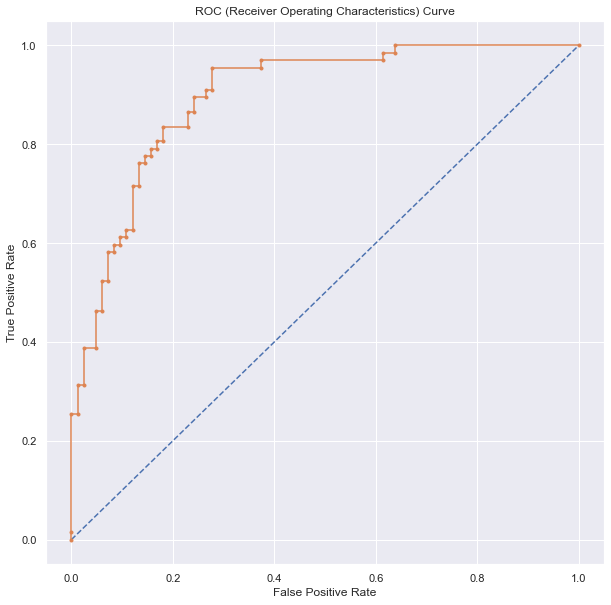

In [360]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = xgb2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_xgb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_xgb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.800 auc_pr=0.870 ap=0.871


Text(0.5, 1.0, 'Precision-Recall Curve')

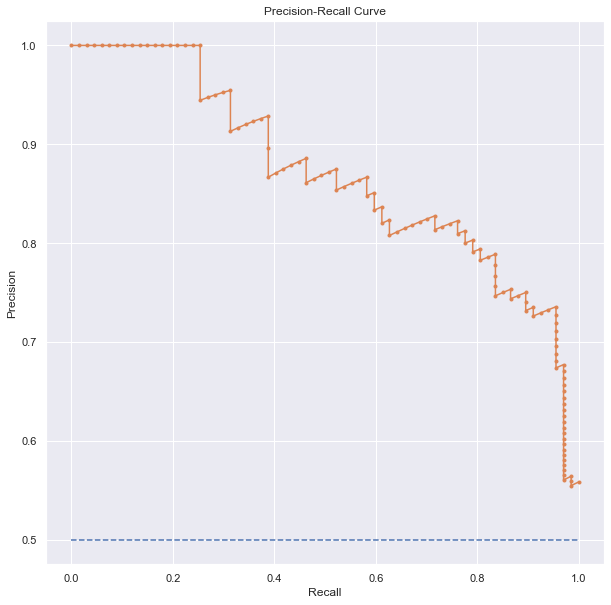

In [361]:
# Precision Recall Curve 

pred_y_test = xgb2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_xgb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [362]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

In [363]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

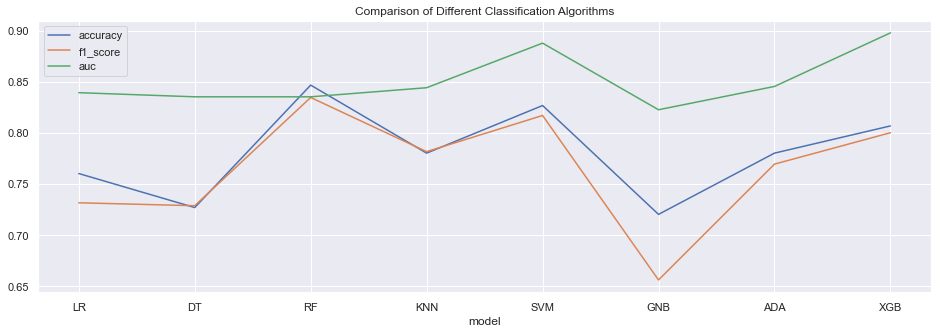

In [364]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

In [365]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.760000,0.731343,0.839238
DT,0.726667,0.728477,0.835192
RF,0.846667,0.834532,0.835192
KNN,0.780000,0.781457,0.844093
SVM,0.826667,0.816901,0.887790
GNB,0.720000,0.655738,0.822514
ADA,0.780000,0.769231,0.845352
XGB,0.806667,0.800000,0.897860


**Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.**

**FINAL CLASSIFIER:**

In [367]:
final_model = rf2

**DATA MODELLING**

(1) Creating a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:

In [369]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        83
           1       0.81      0.87      0.83        67

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [370]:

confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[69 14]
 [ 9 58]]


In [373]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [374]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.847
Precision: 0.806
Sensitivity: 0.866
Specificity: 0.831
AUC: 0.936


**Sensitivity and Specificity:** By changing the threshold, target classification will be changed hence the sensitivity and specificity will also be changed. Which one of these two we should maximize? What should be ideal threshold?

Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off. Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity.

The threshold is set based on business problem. There are some cases where Sensitivity is important and need to be near to 1. There are business cases where Specificity is important and need to be near to 1. We need to understand the business problem and decide the importance of Sensitivity and Specificity.

In [375]:
writer = pd.ExcelWriter('C:\\Users\\91940\\Documents\\Capston Proj Healthcare\\final_healtcare.xlsx', engine='xlsxwriter')

df_resampled.to_excel(writer, sheet_name='master_data', index=False)
writer.save()